In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ydata_profiling import ProfileReport

## EDA 1

In [ ]:
!pip install pygwalker

In [2]:
import pygwalker as pyg

c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [ ]:
!pip install ydata-profiling

In [ ]:
!pip install wordcloud

Box(children=(HTML(value='<div id="ifr-pyg-1" style="height: auto">\n    <head>\n        <meta http-equiv="Con…


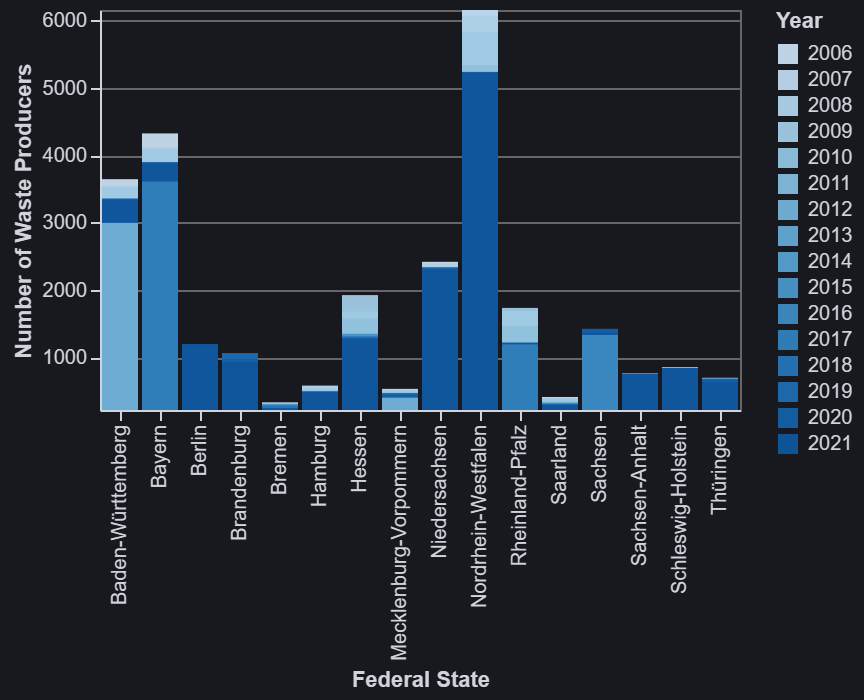
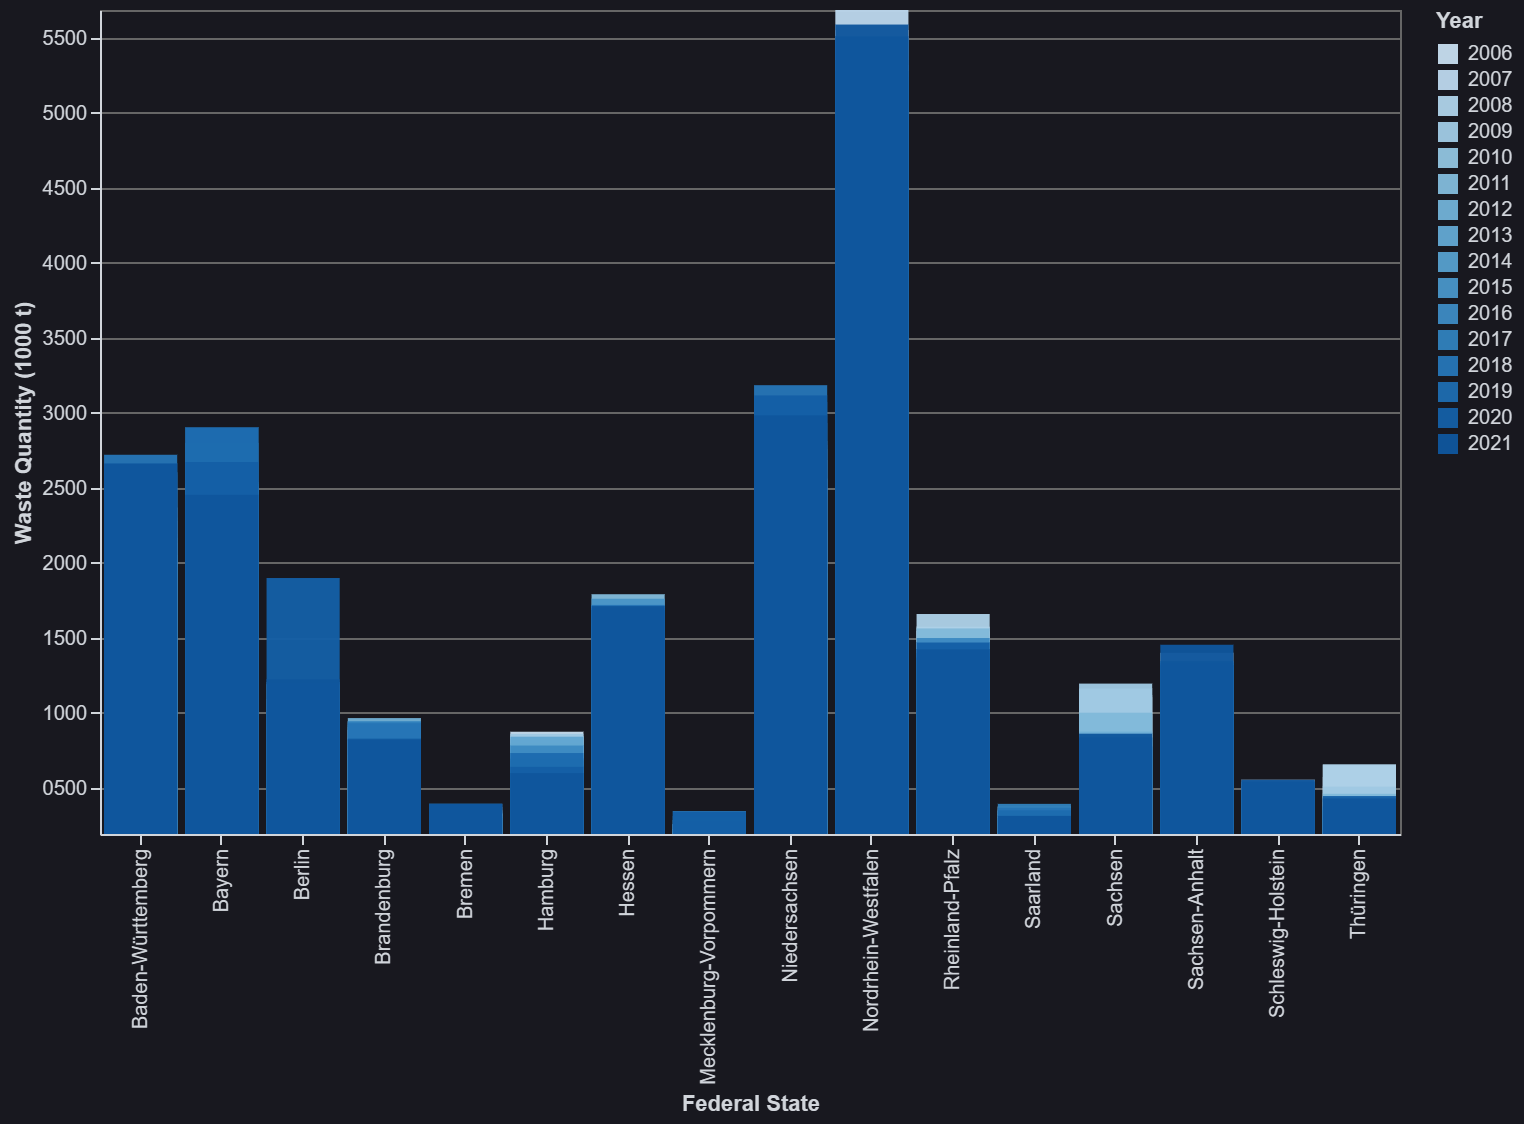
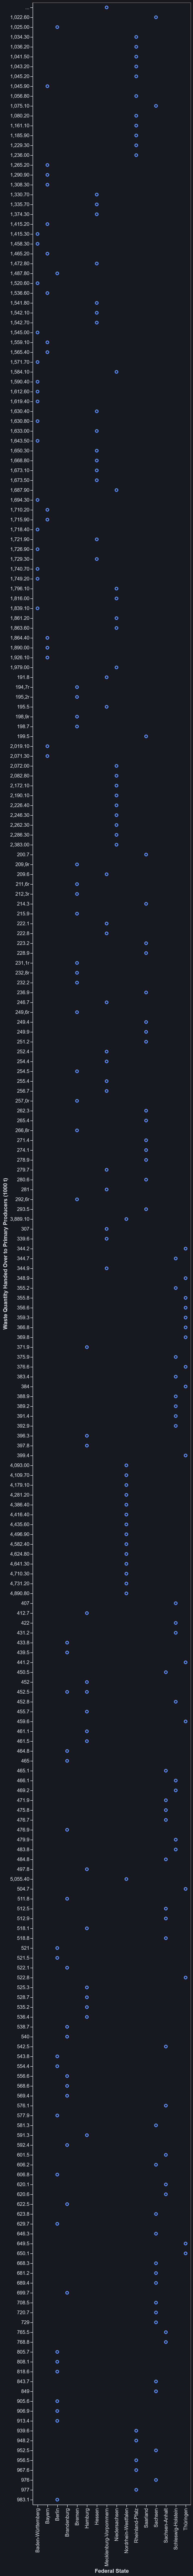
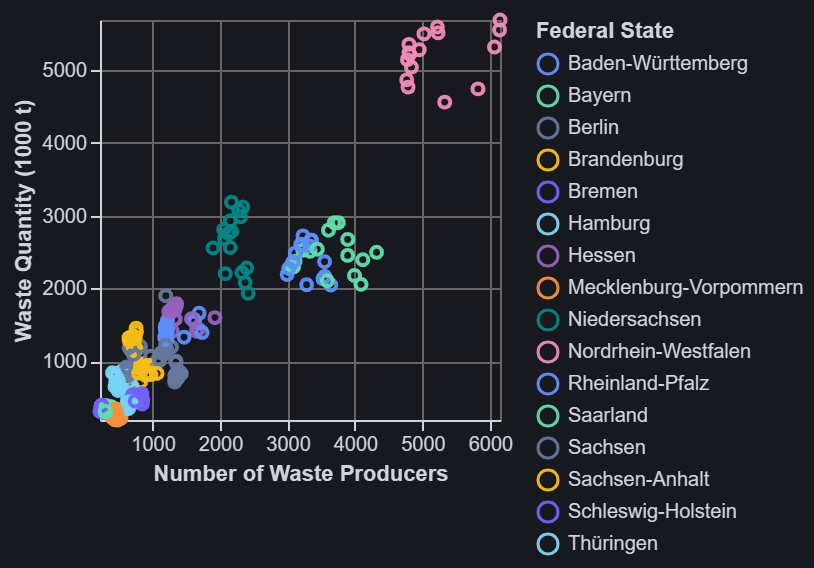
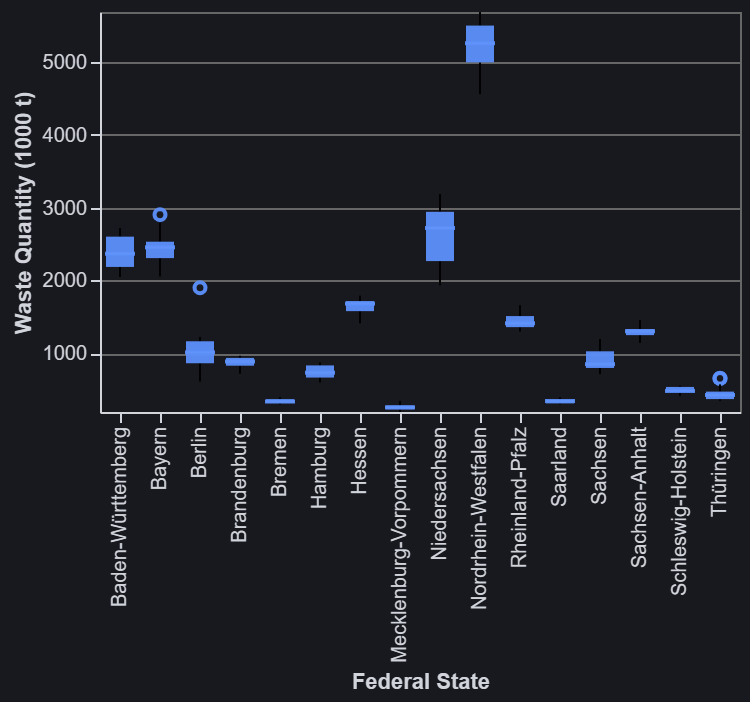
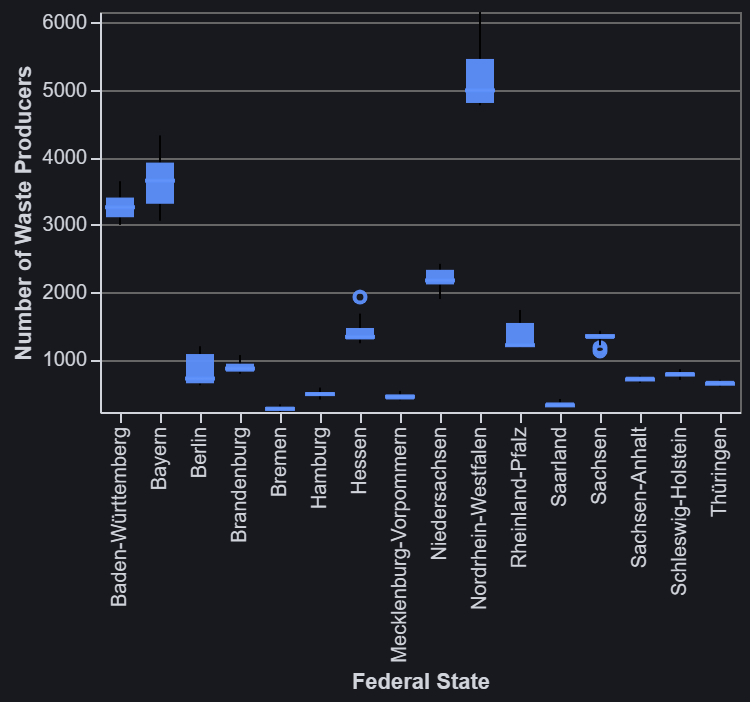
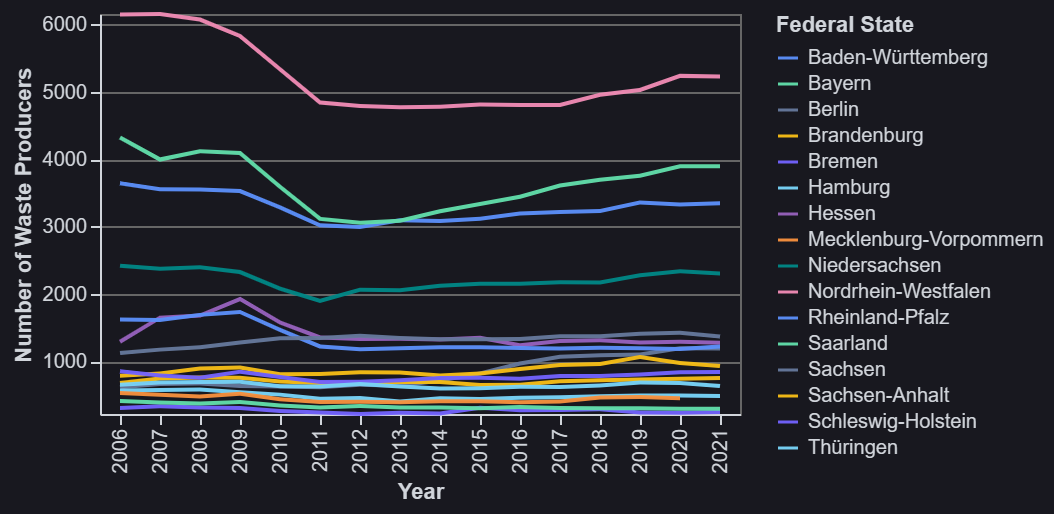
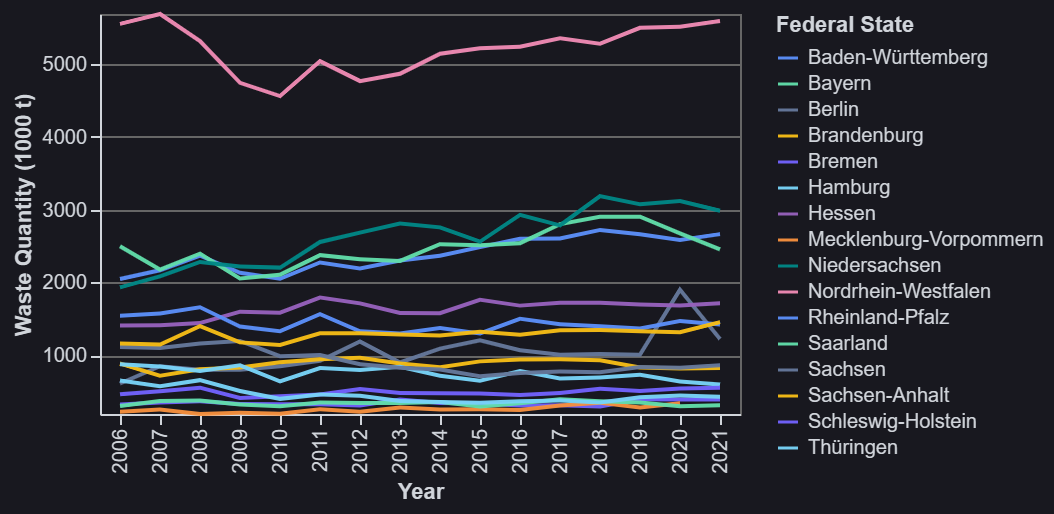
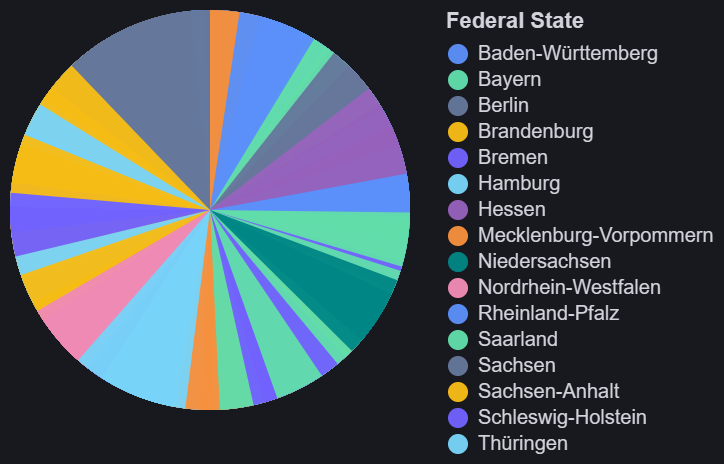
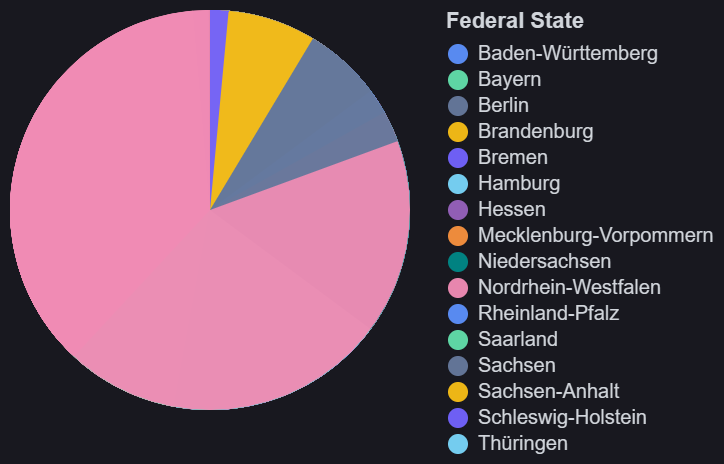

In [6]:
df = pd.read_csv("hazardous_EAV2-6_32151-0003.csv")
walker = pyg.walk(
    df,
    spec="./gw0.json",       # this json will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
    use_kernel_calc=True,    # set `use_kernel_calc=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
    use_preview=True,         # set `use_kernel_calc=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
)

In [92]:
df.head()

,Year,Federal State,Number of Waste Producers,Waste Quantity (1000 t),Waste Quantity Handed Over to Primary Producers (1000 t)
0,2006,Baden-Württemberg,3642,2046,"1,458.30"
1,2006,Bayern,4320,2495,"1,415.20"
2,2006,Berlin,617,610,521
3,2006,Brandenburg,787,882,699.7
4,2006,Bremen,309,323,215.9


Year: The year for which the data is reported, which is 2006 in this case.

Federal State: The name of the German federal state for which the waste data is recorded.

Number of Waste Producers: The number of entities or producers in that federal state responsible for generating waste.

Waste Quantity (1000 t): The total quantity of waste generated in that federal state in thousands of metric tons (1000 t).

Waste Quantity Handed Over to Primary Producers (1000 t): The amount of waste that was handed over to primary producers for further processing or management, also measured in thousands of metric tons (1000 t).

In [93]:
df['Number of Waste Producers'].describe()

count     256
unique    239
top       309
freq        3
Name: Number of Waste Producers, dtype: object

In [94]:
df.isnull().sum()

Year                                                        0
Federal State                                               0
Number of Waste Producers                                   0
Waste Quantity (1000 t)                                     0
Waste Quantity Handed Over to Primary Producers (1000 t)    0
dtype: int64

In [95]:
print(df.columns)

Index(['Year ', 'Federal State ', 'Number of Waste Producers',
       'Waste Quantity (1000 t)',
       'Waste Quantity Handed Over to Primary Producers (1000 t)'],
      dtype='object')


In [96]:
print(df.dtypes)

Year                                                         int64
Federal State                                               object
Number of Waste Producers                                   object
Waste Quantity (1000 t)                                     object
Waste Quantity Handed Over to Primary Producers (1000 t)    object
dtype: object


In [97]:
df.columns

Index(['Year ', 'Federal State ', 'Number of Waste Producers',
       'Waste Quantity (1000 t)',
       'Waste Quantity Handed Over to Primary Producers (1000 t)'],
      dtype='object')

In [98]:
len(set(df['Year ']))

16

In [99]:
df['Number of Waste Producers'] = pd.to_numeric(df['Number of Waste Producers'], errors='coerce')


In [100]:
df['Waste Quantity (1000 t)'] = pd.to_numeric(df['Waste Quantity (1000 t)'], errors='coerce')
df['Waste Quantity Handed Over to Primary Producers (1000 t)'] = pd.to_numeric(df['Waste Quantity Handed Over to Primary Producers (1000 t)'], errors='coerce')

In [101]:
statewise_summary = df.groupby('Federal State ').agg({
    'Year ': 'count', 
    'Number of Waste Producers': 'sum', 
    'Waste Quantity (1000 t)': 'sum', 
    'Waste Quantity Handed Over to Primary Producers (1000 t)': 'sum'  
}).reset_index()


In [102]:
statewise_summary.head()

,Federal State,Year,Number of Waste Producers,Waste Quantity (1000 t),Waste Quantity Handed Over to Primary Producers (1000 t)
0,Baden-Württemberg,16,52512.0,38191.0,0.0
1,Bayern,16,58196.0,39502.0,0.0
2,Berlin,16,13287.0,16414.0,10096.5
3,Brandenburg,16,14104.0,13957.0,8454.3
4,Bremen,16,4361.0,5479.0,901.3


In [103]:
statewise_summary_sorted = statewise_summary.sort_values(by='Waste Quantity (1000 t)', ascending=False)
statewise_summary_sorted = statewise_summary_sorted.reset_index(drop=True)
statewise_summary_sorted

,Federal State,Year,Number of Waste Producers,Waste Quantity (1000 t),Waste Quantity Handed Over to Primary Producers (1000 t)
0,Nordrhein-Westfalen,16,83514.0,83331.0,0.0
1,Niedersachsen,16,35286.0,42132.0,0.0
2,Bayern,16,58196.0,39502.0,0.0
3,Baden-Württemberg,16,52512.0,38191.0,0.0
4,Hessen,16,22530.0,26056.0,0.0
5,Rheinland-Pfalz,16,21344.0,22925.0,4788.9
6,Sachsen-Anhalt,16,11370.0,20558.0,8864.1
7,Berlin,16,13287.0,16414.0,10096.5
8,Sachsen,16,21153.0,14584.0,10275.9
9,Brandenburg,16,14104.0,13957.0,8454.3


- Upon aggregating the data statewise, it is observed that Nordrhein-Westfalen produces the maximum amount of waste.
- Bremen, Saarland, Mecklenburg-Vorpommern have generated the least amount of hazardous waste

In [106]:
df = df.rename(columns={
    'Year ': 'Year',
    'Federal State ': 'State',
})

In [108]:
statewise_data = {}
for state in df['State'].unique():
    state_df = df[df['State'] == state]
    statewise_data[state] = state_df

Analyzing Trends in the Number of Waste Producers

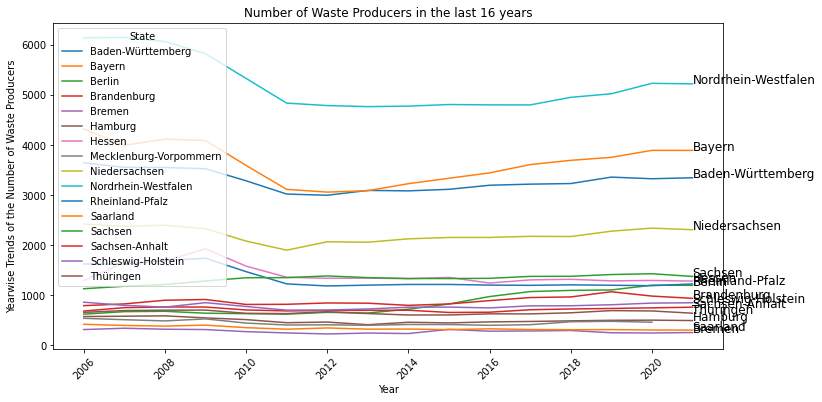

In [109]:
plt.figure(figsize=(12, 6))

for state, state_data in statewise_data.items():
    state_data = state_data.sort_values(by='Year')
    plt.plot(state_data['Year'].values, state_data['Number of Waste Producers'].values, label=state)
    plt.annotate(state, xy=(state_data['Year'].values[-1], state_data['Number of Waste Producers'].values[-1]), fontsize=12)
plt.title('Number of Waste Producers in the last 16 years')
plt.xlabel('Year')
plt.ylabel('Yearwise Trends of the Number of Waste Producers')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper left')
plt.show()

- Most states have maintained a more or less constant number of waste producers in the last 16 years
- Bayern, Nordrhein-Westfalen and Baden-Württemberg showed a significant dip from 2010 - 2012 

Analyzing Trends in Waste Quantity

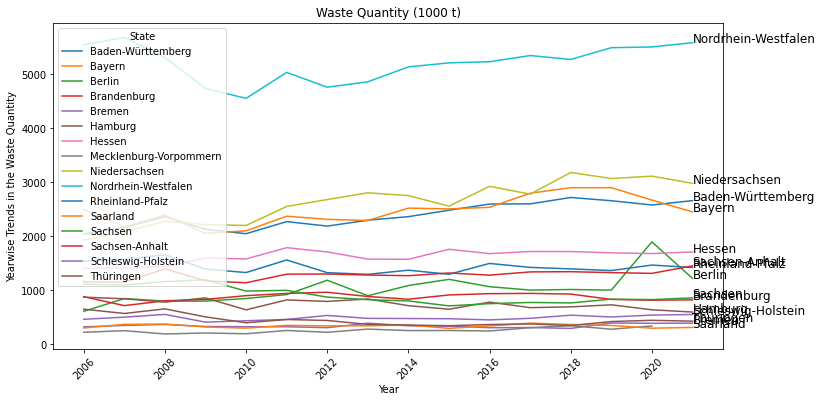

In [110]:
plt.figure(figsize=(12, 6))

for state, state_data in statewise_data.items():
    state_data = state_data.sort_values(by='Year')
    plt.plot(state_data['Year'].values, state_data['Waste Quantity (1000 t)'].values, label=state)
    plt.annotate(state, xy=(state_data['Year'].values[-1], state_data['Waste Quantity (1000 t)'].values[-1]), fontsize=12)
plt.title('Waste Quantity (1000 t)')
plt.xlabel('Year')
plt.ylabel('Yearwise Trends in the Waste Quantity')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper left')
plt.show()

Analyzing Trends in Waste Quantity Handed Over to Primary Producers (1000 t)

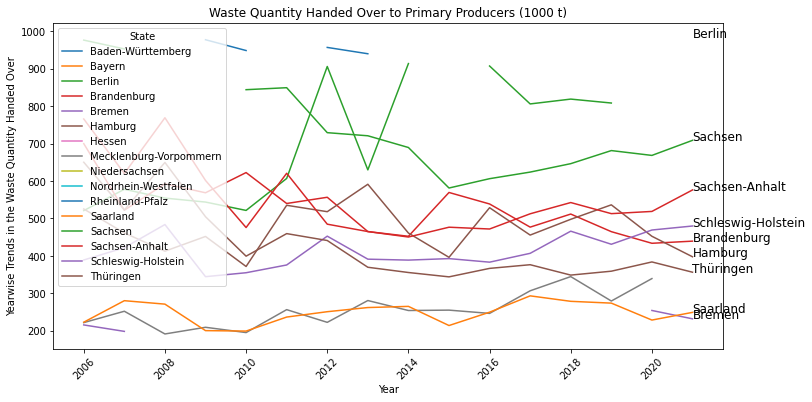

In [111]:
plt.figure(figsize=(12, 6))

for state, state_data in statewise_data.items():
    state_data = state_data.sort_values(by='Year')
    plt.plot(state_data['Year'].values, state_data['Waste Quantity Handed Over to Primary Producers (1000 t)'].values, label=state)
    plt.annotate(state, xy=(state_data['Year'].values[-1], state_data['Waste Quantity Handed Over to Primary Producers (1000 t)'].values[-1]), fontsize=12)
plt.title('Waste Quantity Handed Over to Primary Producers (1000 t)')
plt.xlabel('Year')
plt.ylabel('Yearwise Trends in the Waste Quantity Handed Over')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper left')
plt.show()

- Trend for Waste Quantity generated and waste quantity handed over is similar, except for 'Bremen' which shows a steep rise and dip at the start and end of the given time period

Year                                                          0
State                                                         0
Number of Waste Producers                                     1
Waste Quantity (1000 t)                                       1
Waste Quantity Handed Over to Primary Producers (1000 t)    108
Waste Per Producer                                            1
dtype: int64
              Year  Number of Waste Producers  Waste Quantity (1000 t)  \
count   256.000000                 255.000000               255.000000   
mean   2013.500000                1491.952941              1409.082353   
std       4.618802                1383.326382              1255.397941   
min    2006.000000                 221.000000               191.000000   
25%    2009.750000                 600.500000               468.000000   
50%    2013.500000                 847.000000               964.000000   
75%    2017.250000                1910.000000              1914.500000   
max    2021

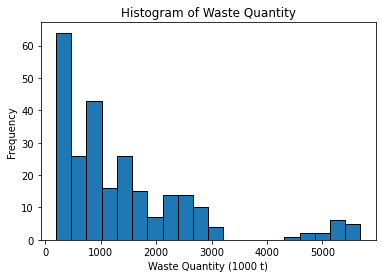

c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


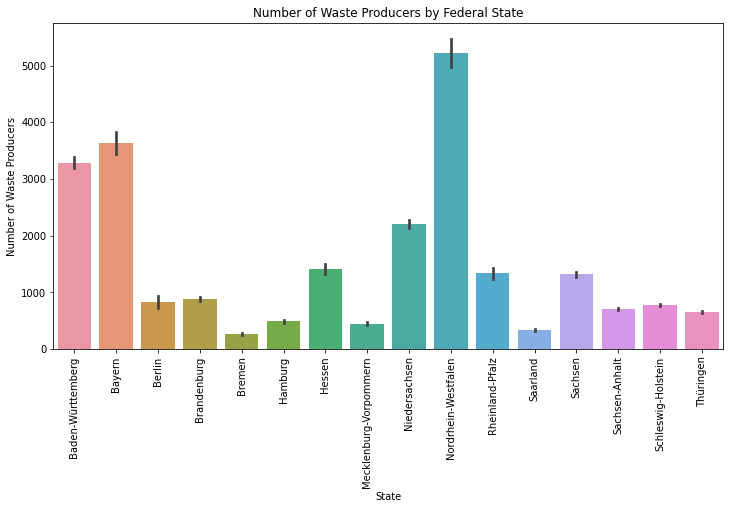

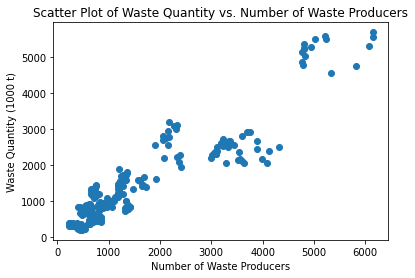

c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


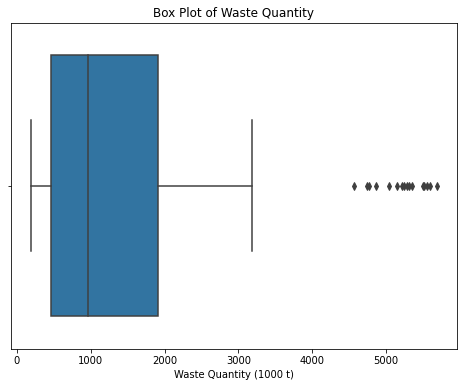

                                                        Year  \
Year                                                1.000000   
Number of Waste Producers                          -0.020871   
Waste Quantity (1000 t)                             0.052809   
Waste Quantity Handed Over to Primary Producers... -0.061445   
Waste Per Producer                                  0.112168   

                                                    Number of Waste Producers  \
Year                                                                -0.020871   
Number of Waste Producers                                            1.000000   
Waste Quantity (1000 t)                                              0.930601   
Waste Quantity Handed Over to Primary Producers...                   0.768639   
Waste Per Producer                                                  -0.237112   

                                                    Waste Quantity (1000 t)  \
Year                                             

In [115]:
print(df.isnull().sum())

print(df.describe())

plt.hist(df['Waste Quantity (1000 t)'], bins=20, edgecolor='k')
plt.xlabel('Waste Quantity (1000 t)')
plt.ylabel('Frequency')
plt.title('Histogram of Waste Quantity')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Number of Waste Producers', data=df)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Waste Producers')
plt.title('Number of Waste Producers by Federal State')
plt.show()

plt.scatter(df['Number of Waste Producers'], df['Waste Quantity (1000 t)'])
plt.xlabel('Number of Waste Producers')
plt.ylabel('Waste Quantity (1000 t)')
plt.title('Scatter Plot of Waste Quantity vs. Number of Waste Producers')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Waste Quantity (1000 t)'])
plt.xlabel('Waste Quantity (1000 t)')
plt.title('Box Plot of Waste Quantity')
plt.show()

df_ = df.drop(['State'], axis=1)
correlation_matrix = df_.corr()
print(correlation_matrix)

state_waste_total = df.groupby('State')['Waste Quantity (1000 t)'].sum().reset_index()
print(state_waste_total)

df['Waste Per Producer'] = df['Waste Quantity (1000 t)'] / df['Number of Waste Producers']
print(df[['State', 'Waste Per Producer']])

threshold = 3000  
df_filtered = df[df['Waste Quantity (1000 t)'] <= threshold]

from scipy.stats import ttest_ind
state_A = df[df['State'] == 'State_A']['Waste Quantity (1000 t)']
state_B = df[df['State'] == 'State_B']['Waste Quantity (1000 t)']
t_stat, p_value = ttest_ind(state_A, state_B)
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')

state_waste_handed_over = df.groupby('State')['Waste Quantity Handed Over to Primary Producers (1000 t)'].sum().reset_index()
print(state_waste_handed_over)


In [116]:
Q1 = df['Waste Quantity (1000 t)'].quantile(0.25)
Q3 = df['Waste Quantity (1000 t)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Waste Quantity (1000 t)'] < lower_bound) | (df['Waste Quantity (1000 t)'] > upper_bound)]
print(outliers)

     Year                State  Number of Waste Producers  \
9    2006  Nordrhein-Westfalen                     6143.0   
25   2007  Nordrhein-Westfalen                     6149.0   
41   2008  Nordrhein-Westfalen                     6067.0   
57   2009  Nordrhein-Westfalen                     5823.0   
73   2010  Nordrhein-Westfalen                     5330.0   
89   2011  Nordrhein-Westfalen                     4836.0   
105  2012  Nordrhein-Westfalen                     4787.0   
121  2013  Nordrhein-Westfalen                     4766.0   
137  2014  Nordrhein-Westfalen                     4776.0   
153  2015  Nordrhein-Westfalen                     4808.0   
169  2016  Nordrhein-Westfalen                     4801.0   
185  2017  Nordrhein-Westfalen                     4800.0   
201  2018  Nordrhein-Westfalen                     4952.0   
217  2019  Nordrhein-Westfalen                     5023.0   
233  2020  Nordrhein-Westfalen                     5232.0   
249  2021  Nordrhein-Wes

In [117]:
total_data_points = len(df)  
num_outliers = len(outliers) 

percentage_outliers = (num_outliers / total_data_points) * 100


In [118]:
total_data_points = len(df)  
num_outliers = len(outliers)  

percentage_outliers = (num_outliers / total_data_points) * 100

print(f"Percentage of data in the outlier area: {percentage_outliers:.2f}%")


Percentage of data in the outlier area: 6.25%


In [120]:

state_statistics = df.groupby('State').agg({
    'Number of Waste Producers': 'sum',
    'Waste Quantity (1000 t)': 'sum',
    'Waste Quantity Handed Over to Primary Producers (1000 t)': 'sum'
}).reset_index()

state_statistics.columns = ['State', 'Total Waste Producers', 'Total Waste Quantity (1000 t)', 'Total Waste Handed Over (1000 t)']

print(state_statistics)


                     State  Total Waste Producers  \
0        Baden-Württemberg                52512.0   
1                   Bayern                58196.0   
2                   Berlin                13287.0   
3              Brandenburg                14104.0   
4                   Bremen                 4361.0   
5                  Hamburg                 7882.0   
6                   Hessen                22530.0   
7   Mecklenburg-Vorpommern                 6695.0   
8            Niedersachsen                35286.0   
9      Nordrhein-Westfalen                83514.0   
10         Rheinland-Pfalz                21344.0   
11                Saarland                 5374.0   
12                 Sachsen                21153.0   
13          Sachsen-Anhalt                11370.0   
14      Schleswig-Holstein                12453.0   
15               Thüringen                10387.0   

    Total Waste Quantity (1000 t)  Total Waste Handed Over (1000 t)  
0                         38

## Dashboard 1


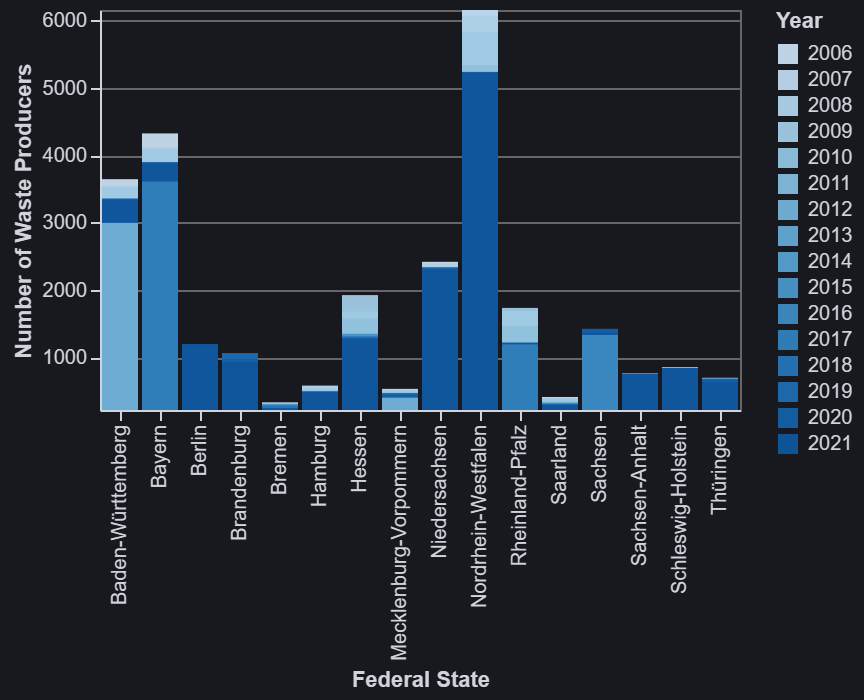


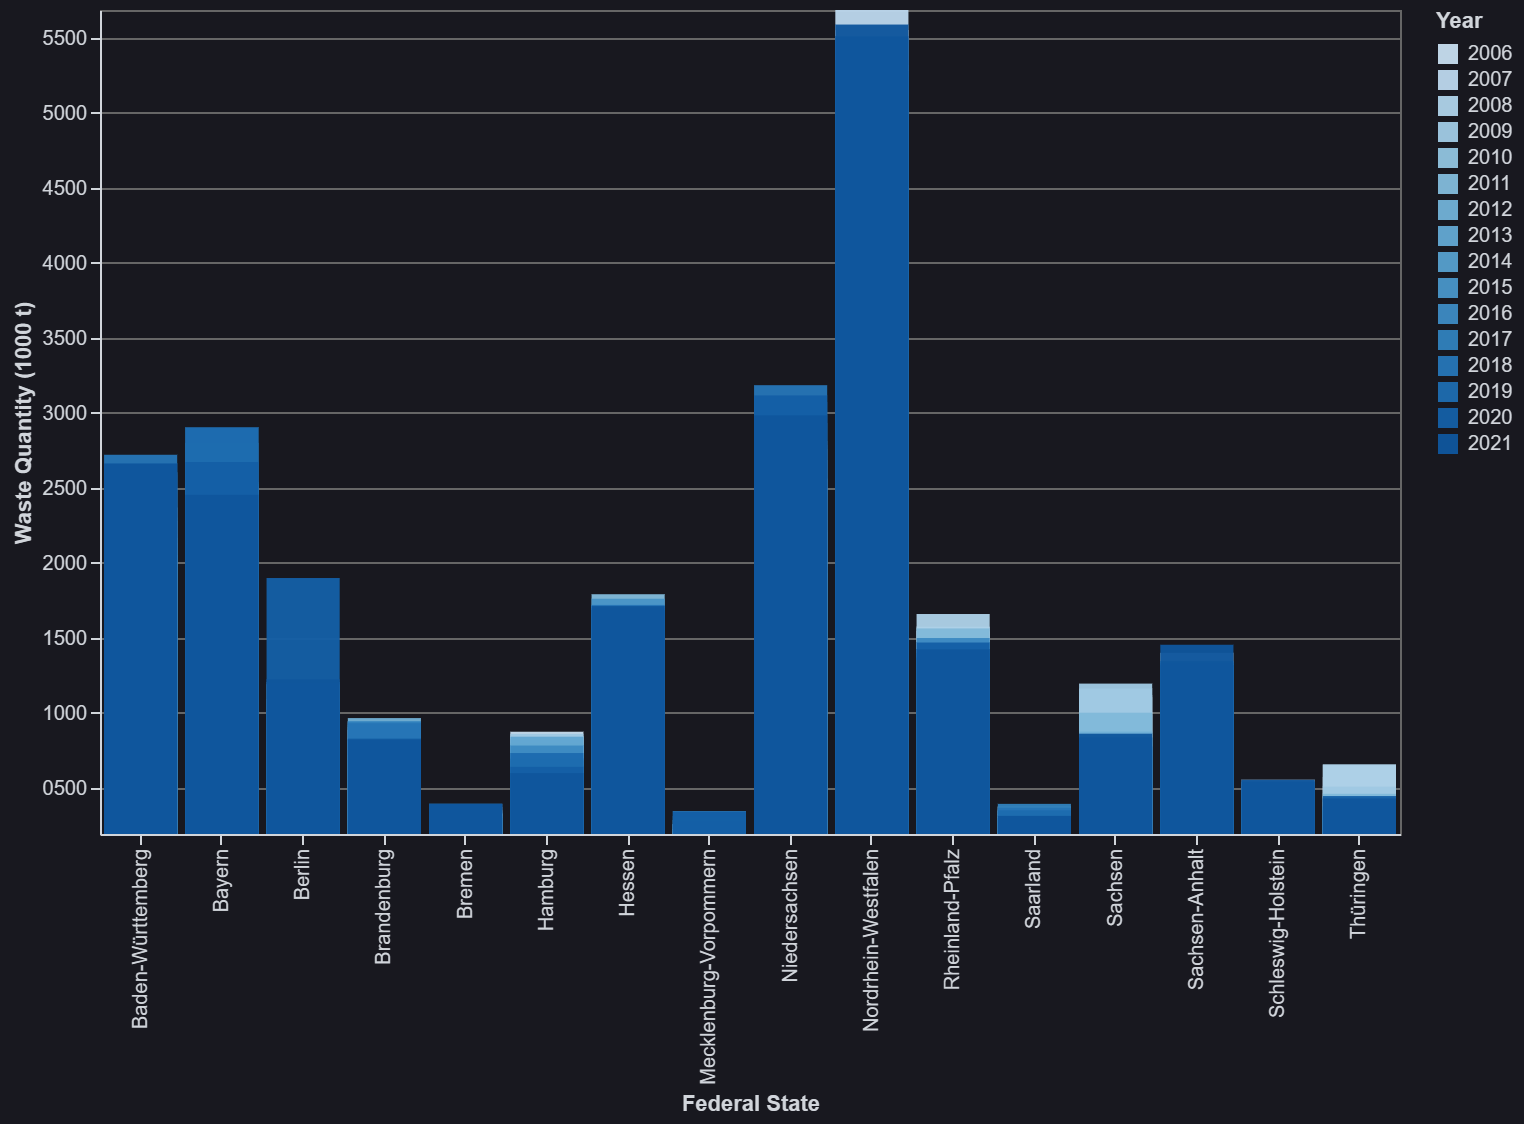


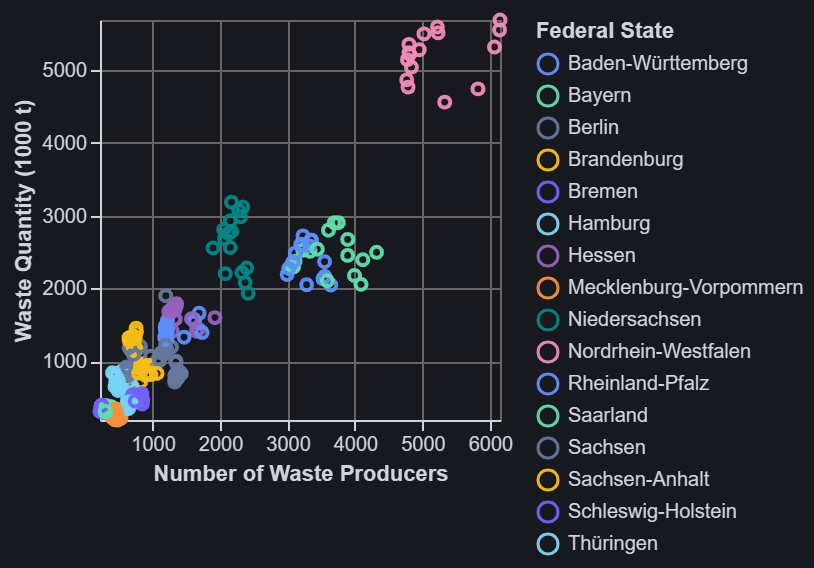


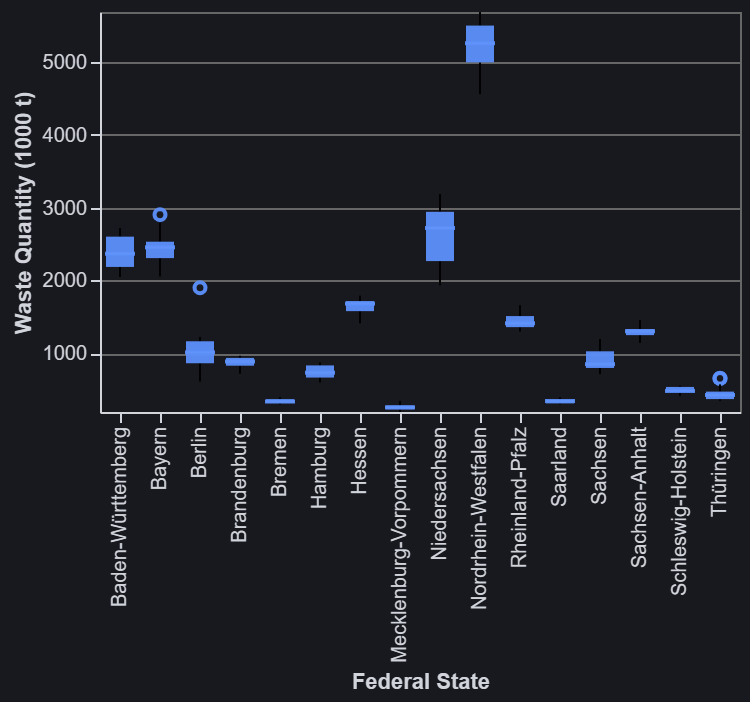


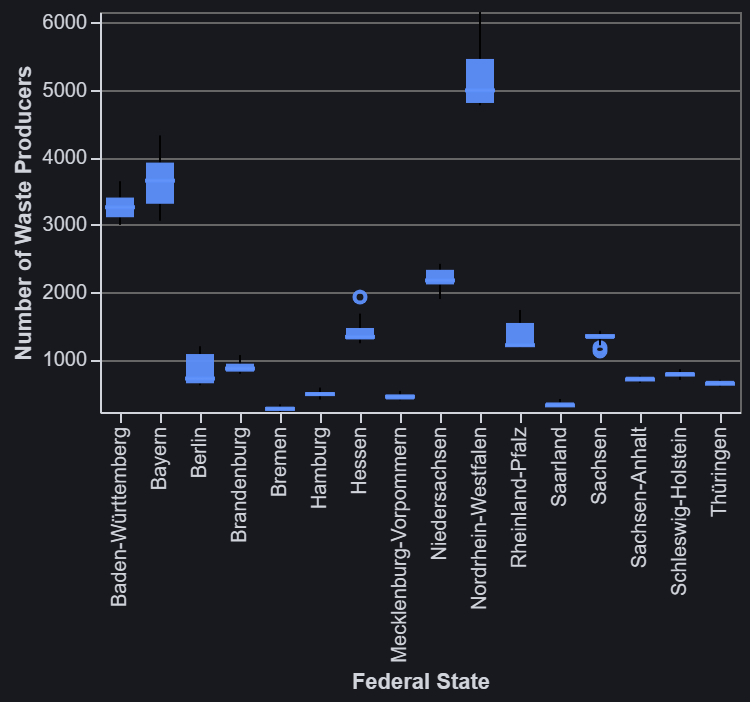


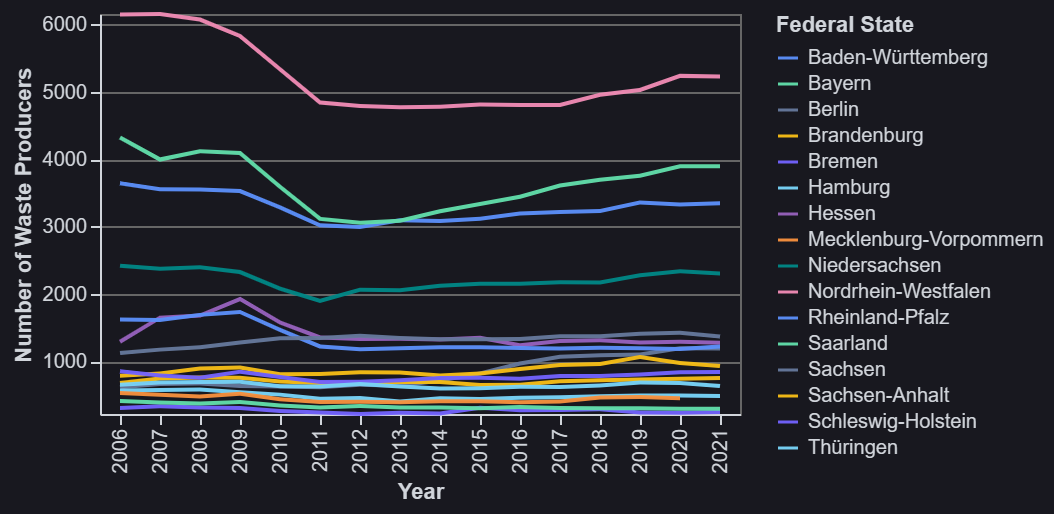


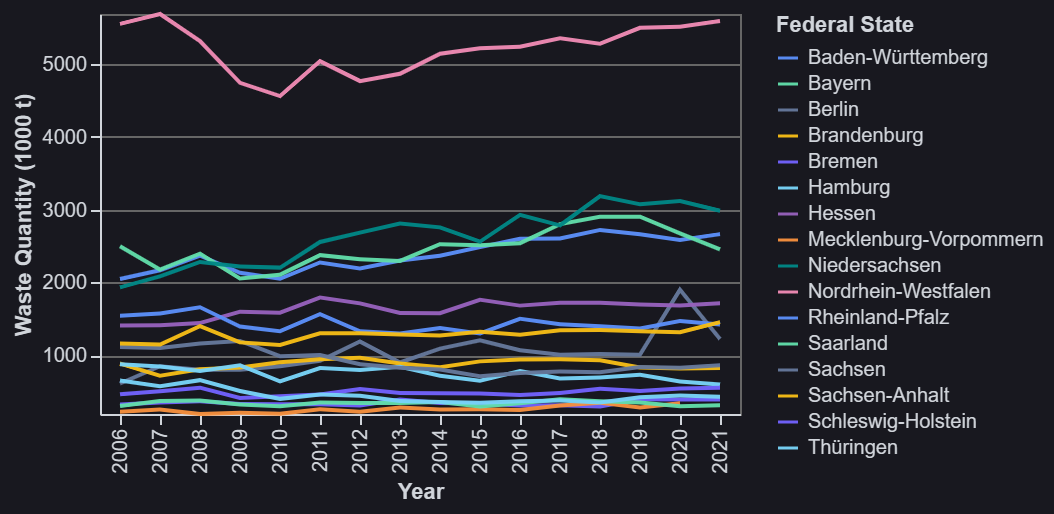


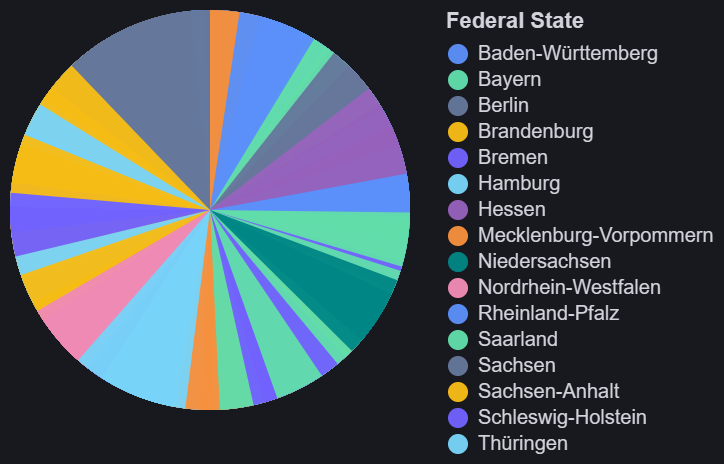


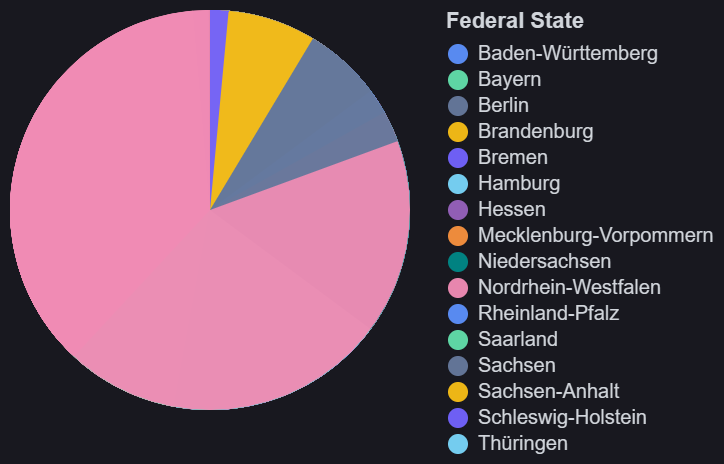

In [19]:
walker.display_chart("Chart 1", title="Year-wise Distribution of Number of Waste Producers per State")
walker.display_chart("Chart 2", title="Year-wise Distribution of Waste Quantity (1000 t) per State")
walker.display_chart("Chart 4", title="Waste Quantity v/s Number of Producers per State")
walker.display_chart("Chart 5", title="Box-Plot of Waste Quantity (1000 t) per State")
walker.display_chart("Chart 6", title="Box-Plot of Number of Waste Producers per State")
walker.display_chart("Chart 7", title="Year-wise Trends in the Number of Waste Producers per State")
walker.display_chart("Chart 8", title="Year-wise Trends in the Waste Quantity (1000 t) per State")
walker.display_chart("Chart 9", title="Pie Chart - Waste Quantity Handed over")
walker.display_chart("Chart 10", title="Pie Chart - Number of Waste Producers")

## EDA 2

In [121]:
data = pd.read_csv("hazardous_EAV2-6_32151-0002.csv")

In [122]:
data.head()

,Unnamed: 0,year,code,type of waste,waste producers,waste quantities,waste quantities generated by primary producers
0,0,2006,EAV-01,"Wastes resulting from exploration, mining of ...",26.0,140.6,139.5
1,1,2006,EAV-010304-G,Acid-generating tailings from proc.of sulphid...,0.0,0.0,0.0
2,2,2006,EAV-010305-G,Other tailings containing hazardous substances,0.0,0.0,0.0
3,3,2006,EAV-010307-G,"Wastes from phys.,chem. proc. of metal. minerals",0.0,0.0,0.0
4,4,2006,EAV-010407-G,"Wastes from phys.,chem. proc. of non-met. min...",3.0,0.4,0.4


In [123]:
data.drop(['Unnamed: 0'], axis = 1)
data.head()

,Unnamed: 0,year,code,type of waste,waste producers,waste quantities,waste quantities generated by primary producers
0,0,2006,EAV-01,"Wastes resulting from exploration, mining of ...",26.0,140.6,139.5
1,1,2006,EAV-010304-G,Acid-generating tailings from proc.of sulphid...,0.0,0.0,0.0
2,2,2006,EAV-010305-G,Other tailings containing hazardous substances,0.0,0.0,0.0
3,3,2006,EAV-010307-G,"Wastes from phys.,chem. proc. of metal. minerals",0.0,0.0,0.0
4,4,2006,EAV-010407-G,"Wastes from phys.,chem. proc. of non-met. min...",3.0,0.4,0.4


In [124]:
data.isnull().sum()

Unnamed: 0                                         0
year                                               0
code                                               0
type of waste                                      0
waste producers                                    0
waste quantities                                   0
waste quantities generated by primary producers    0
dtype: int64

Year: The year in which the data is reported (e.g., 2006).

Code: A code or identifier for the type of waste.

Type of Waste: A description of the waste category.

Waste Producers: The number of entities or producers responsible for generating this type of waste.

Waste Quantities: The total quantity of waste generated.

Waste Quantities Generated by Primary Producers: The amount of waste handed over to primary producers for further processing or management.

In [125]:
data = data.iloc[:, 1:]
data.head()

,year,code,type of waste,waste producers,waste quantities,waste quantities generated by primary producers
0,2006,EAV-01,"Wastes resulting from exploration, mining of ...",26.0,140.6,139.5
1,2006,EAV-010304-G,Acid-generating tailings from proc.of sulphid...,0.0,0.0,0.0
2,2006,EAV-010305-G,Other tailings containing hazardous substances,0.0,0.0,0.0
3,2006,EAV-010307-G,"Wastes from phys.,chem. proc. of metal. minerals",0.0,0.0,0.0
4,2006,EAV-010407-G,"Wastes from phys.,chem. proc. of non-met. min...",3.0,0.4,0.4


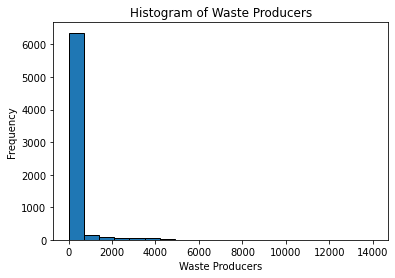

c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


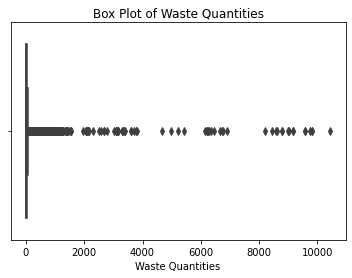

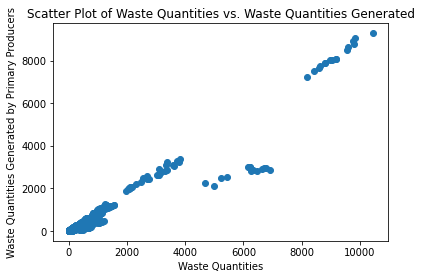

In [126]:
plt.hist(data['waste producers'], bins=20, edgecolor='k')
plt.xlabel('Waste Producers')
plt.ylabel('Frequency')
plt.title('Histogram of Waste Producers')
plt.show()

sns.boxplot(x=data['waste quantities'])
plt.xlabel('Waste Quantities')
plt.title('Box Plot of Waste Quantities')
plt.show()

plt.scatter(data['waste quantities'], data['waste quantities generated by primary producers'])
plt.xlabel('Waste Quantities')
plt.ylabel('Waste Quantities Generated by Primary Producers')
plt.title('Scatter Plot of Waste Quantities vs. Waste Quantities Generated')
plt.show()


In [127]:
data_ = data.drop(['code', 'type of waste'], axis=1)
data_.head()

,year,waste producers,waste quantities,waste quantities generated by primary producers
0,2006,26.0,140.6,139.5
1,2006,0.0,0.0,0.0
2,2006,0.0,0.0,0.0
3,2006,0.0,0.0,0.0
4,2006,3.0,0.4,0.4


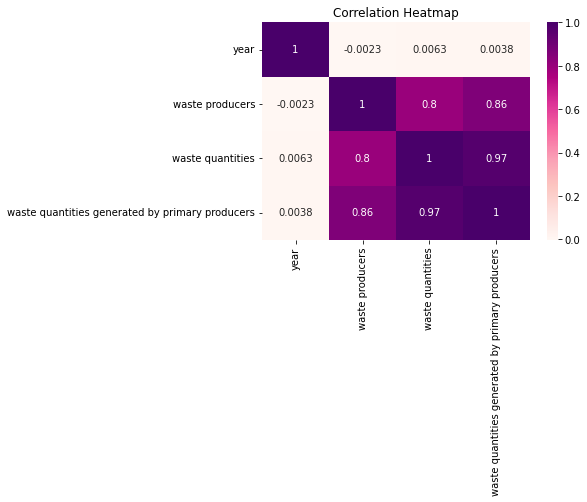

In [128]:
correlation_matrix = data_.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu')
plt.title('Correlation Heatmap')
plt.show()

In [129]:
waste_type_stats = data.groupby('type of waste').agg({
    'waste producers': 'sum',
    'waste quantities': 'sum',
    'waste quantities generated by primary producers': 'sum'
}).reset_index()

waste_type_stats.columns = ['Type of Waste', 'Total Waste Producers', 'Total Waste Quantity', 'Total Waste Handed Over']


In [130]:
waste_type_stats.head()

,Type of Waste,Total Waste Producers,Total Waste Quantity,Total Waste Handed Over
0,"Absorbents, filter materials, wiping cloths etc.",34423.0,3203.7,2317.7
1,Acid-generating tailings from proc.of sulphid...,0.0,0.0,0.0
2,Activated carbon from chlorine production,16.0,0.0,0.0
3,Adhesive and sealant sludges cont.organic sol...,162.0,6.2,5.5
4,"Adhesives, sealants: Rosin oil",0.0,0.0,0.0


In [131]:
waste_type_stats['Type of Waste'].unique()

array([' Absorbents, filter materials, wiping cloths etc.',
       ' Acid-generating tailings from proc.of sulphide ore',
       ' Activated carbon from chlorine production',
       ' Adhesive and sealant sludges cont.organic solvents',
       ' Adhesives, sealants: Rosin oil',
       ' Adhesives,sealants: Aqueous liquid waste cont.adh.',
       ' Adhesives,sealants: Aqueous sludges cont.adhesives',
       ' Agrochemical waste containing hazardous substances',
       ' Aluminium: Black dross from secondary production',
       ' Aluminium: Primary production slags',
       ' Aluminium: Salt slags from secondary production',
       ' Aluminium: Skimmings that are flammable etc.',
       ' Aluminium: Sludges, filter cakes from gas treatment.',
       ' Aluminium: Tar-containing wastes from anode manuf.',
       ' Aluminium: Wastes fr.cooling-water treatm.cont.oil',
       ' Aluminium: Wastes from treatment. of salt slags etc.',
       ' Aluminum: Flue-gas dust cont. hazardous subst.',
   

## Dashboard 2